## 데이터 전처리

In [19]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/heart.csv')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [20]:
df = df.dropna()
df=pd.get_dummies(df,columns=['Sex','AHD','ChestPain','Thal','AHD'])

In [21]:
df

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,...,AHD_Yes,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,63,145,233,1,2,150,0,2.3,3,0.0,...,0,0,0,0,1,1,0,0,1,0
1,67,160,286,0,2,108,1,1.5,2,3.0,...,1,1,0,0,0,0,1,0,0,1
2,67,120,229,0,2,129,1,2.6,2,2.0,...,1,1,0,0,0,0,0,1,0,1
3,37,130,250,0,0,187,0,3.5,3,0.0,...,0,0,1,0,0,0,1,0,1,0
4,41,130,204,0,2,172,0,1.4,1,0.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,0,0,123,1,0.2,2,0.0,...,1,1,0,0,0,0,0,1,0,1
298,45,110,264,0,0,132,0,1.2,2,0.0,...,1,0,0,0,1,0,0,1,0,1
299,68,144,193,1,0,141,0,3.4,2,2.0,...,1,1,0,0,0,0,0,1,0,1
300,57,130,131,0,0,115,1,1.2,2,1.0,...,1,1,0,0,0,0,0,1,0,1


In [22]:
y=df['AHD_Yes']
X=df.drop(columns=['AHD_No','AHD_Yes'])

## 데이터 스케일링

In [23]:
X_norm=(X-X.mean())/X.std()
X_norm

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Sex_0,Sex_1,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,0.934603,0.749116,-0.275978,2.426332,1.008496,0.017465,-0.695246,1.067164,2.260330,-0.720760,-0.689930,0.689930,-0.955534,-0.621727,-0.443751,3.445712,3.930370,-1.108572,-0.793562
1,1.376605,1.593577,0.743301,-0.410757,1.008496,-1.813274,1.433497,0.381130,0.642696,2.474249,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,0.899025,-0.793562
2,1.376605,-0.658320,-0.352904,-0.410757,1.008496,-0.897904,1.433497,1.324427,0.642696,1.409246,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
3,-1.938409,-0.095345,0.050961,-0.410757,-1.001728,1.630258,-0.695246,2.096215,2.260330,-0.720760,-0.689930,0.689930,-0.955534,1.603007,-0.443751,-0.289239,-0.253572,0.899025,-0.793562
4,-1.496407,-0.095345,-0.833696,-0.410757,1.008496,0.976423,-0.695246,0.295376,-0.974938,-0.720760,1.444542,-1.444542,-0.955534,-0.621727,2.245926,-0.289239,-0.253572,0.899025,-0.793562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.271600,0.467629,-0.122124,-0.410757,-1.001728,-1.159438,1.433497,-0.733675,0.642696,-0.720760,1.444542,-1.444542,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
298,-1.054405,-1.221294,0.320204,-0.410757,-1.001728,-0.767137,-0.695246,0.123867,0.642696,-0.720760,-0.689930,0.689930,-0.955534,-0.621727,-0.443751,3.445712,-0.253572,-1.108572,1.255898
299,1.487106,0.692818,-1.045244,2.426332,-1.001728,-0.374836,-0.695246,2.010461,0.642696,1.409246,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
300,0.271600,-0.095345,-2.237607,-0.410757,-1.001728,-1.508150,1.433497,0.123867,0.642696,0.344243,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898


In [24]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
kfold=KFold(n_splits=5, shuffle=True)

train_accuracy=[]
test_accuracy=[]
for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_norm,y)
    result=cross_validate(X=X_norm,y=y,cv=kfold,
                          scoring=['accuracy','roc_auc'],
                          estimator=knn,
                          return_train_score=True)
    print(i, result['test_accuracy'].mean(), result['test_roc_auc'].mean())
    train_accuracy.append(result['train_accuracy'].mean())
    test_accuracy.append(result['test_accuracy'].mean())

2 0.7305084745762712 0.8144261613432914
3 0.777909604519774 0.8466801773759226
4 0.7781920903954802 0.8749509778301515
5 0.7947457627118645 0.8699851923469668
6 0.7982485875706214 0.8712346660223181
7 0.8181920903954802 0.8707832725149615
8 0.8246892655367233 0.8907169738863286
9 0.8116949152542373 0.8840841718549519
10 0.8182485875706215 0.8892498396665063
11 0.8382485875706216 0.901570366362033
12 0.8216949152542373 0.8828316416680293
13 0.8250282485875706 0.889369760741749
14 0.8383615819209039 0.8941906880138116
15 0.8114689265536723 0.8996047052069039
16 0.8320338983050848 0.8938485918576644
17 0.838361581920904 0.8940281869286318
18 0.8281355932203389 0.8982457370025305
19 0.8349152542372881 0.9004433078868562
20 0.8315819209039548 0.9129180501749288
21 0.8216949152542373 0.9077068449010476
22 0.8251977401129944 0.902434474342083
23 0.8313559322033898 0.9117045114559346
24 0.8312429378531073 0.8969561786238529
25 0.8112994350282486 0.897786251914358
26 0.8253107344632766 0.905586

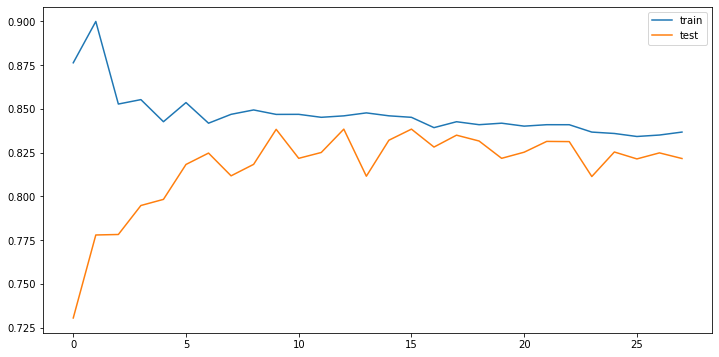

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.legend()

## GridSearchCV를 사용한 자동화

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

# 파이프라인 재료
knn = KNeighborsClassifier()
scaler = StandardScaler()

# 파이프라인 만들기
pipe = Pipeline([('scaler',scaler),('knn',knn)])

# 하이퍼패러미터 범주지정
degree = range(1,20)
param_grid = {'knn__n_neighbors':degree}

# 교차검증 객체지정
kfold = KFold(n_splits=5, shuffle=True)

# GridSearchCV이용 하이퍼패러미터 튜닝 자동화
grid_search = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid,
    cv = kfold,
    scoring = 'accuracy',
    return_train_score=True    
)

# 학습
grid_search.fit(X,y)



GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True, scoring='accuracy')

In [27]:
import pandas as pd

df=pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007443,0.003357,0.009924,0.005256,1,{'knn__n_neighbors': 1},0.716667,0.766667,0.796610,0.796610,...,0.764463,0.030679,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004485,0.000309,0.005970,0.000128,2,{'knn__n_neighbors': 2},0.750000,0.700000,0.762712,0.728814,...,0.740847,0.023888,19,0.881857,0.877637,0.890756,0.861345,0.865546,0.875428,0.010744
2,0.004413,0.000121,0.006009,0.000171,3,{'knn__n_neighbors': 3},0.766667,0.750000,0.762712,0.813559,...,0.771130,0.021947,16,0.902954,0.907173,0.894958,0.890756,0.878151,0.894798,0.010130
3,0.004498,0.000068,0.006111,0.000091,4,{'knn__n_neighbors': 4},0.766667,0.750000,0.745763,0.762712,...,0.767740,0.024181,17,0.856540,0.856540,0.857143,0.836134,0.827731,0.846818,0.012443
4,0.004460,0.000087,0.006015,0.000117,5,{'knn__n_neighbors': 5},0.783333,0.733333,0.779661,0.813559,...,0.781299,0.026768,14,0.864979,0.856540,0.861345,0.852941,0.852941,0.857749,0.004752
5,0.004912,0.000596,0.006233,0.000189,6,{'knn__n_neighbors': 6},0.766667,0.750000,0.728814,0.796610,...,0.774520,0.035706,15,0.869198,0.860759,0.831933,0.831933,0.806723,0.840109,0.022454
6,0.004437,0.000039,0.006187,0.000167,7,{'knn__n_neighbors': 7},0.800000,0.816667,0.779661,0.779661,...,0.804689,0.025485,13,0.860759,0.860759,0.831933,0.823529,0.852941,0.845984,0.015406
7,0.004509,0.000157,0.006081,0.000083,8,{'knn__n_neighbors': 8},0.800000,0.783333,0.796610,0.830508,...,0.818362,0.035080,12,0.860759,0.856540,0.844538,0.840336,0.831933,0.846821,0.010561
8,0.004524,0.000100,0.006109,0.000089,9,{'knn__n_neighbors': 9},0.816667,0.800000,0.830508,0.813559,...,0.828418,0.028190,10,0.852321,0.869198,0.848739,0.840336,0.865546,0.855228,0.010714
9,0.004485,0.000034,0.006178,0.000168,10,{'knn__n_neighbors': 10},0.816667,0.783333,0.847458,0.813559,...,0.835254,0.044857,3,0.852321,0.860759,0.852941,0.844538,0.836134,0.849339,0.008363


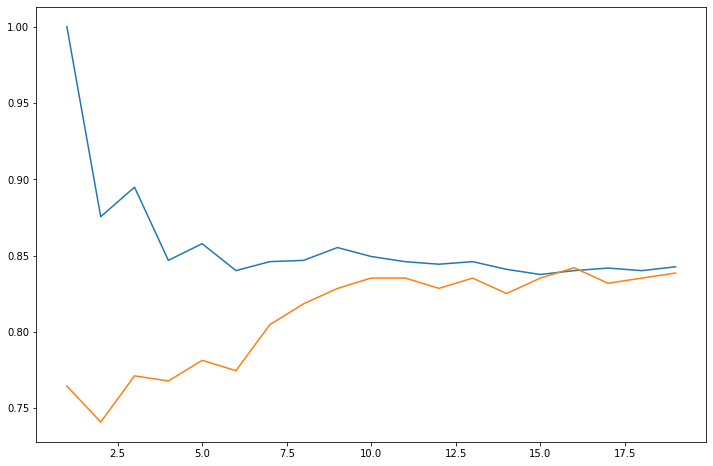

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(df['param_knn__n_neighbors'],df['mean_train_score'])
plt.plot(df['param_knn__n_neighbors'],df['mean_test_score'])

In [29]:
grid_search.best_params_, grid_search.best_score_

({'knn__n_neighbors': 16}, 0.8419774011299435)